In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Regression linéaire - Version courte
```python
# Jeu d'entrainement - Features
X = 2 * np.random.rand(100, 1)
# Jeu d'entrainement - Target
y = 4 + 3 * X + np.random.randn(100, 1)
# Jeu d'entrainement - ajout du biais
X_b = np.c_[np.ones((100, 1)), X]
# Jeu de test - pour tracer une droite entre les valeurs x=0 et x=2
X_test = np.array([[0], [2]])
# Jeu de test - ajout du biais
X_test_b = np.c_[np.ones((2, 1)), X_test]
# Calcul du meilleur vecteur de paramètres avec l'équation normale
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
#  Jeu de test - Prédiction des target
y_predict = X_test_b @ best_theta
# Afficahge du jeu de test et des prédictions
plt.plot(X_test, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.", label="Données d'entrainement")
plt.xlabel("X - features")
plt.ylabel("y - target")
plt.legend()
plt.axis([0, 2, 0, 15])
```

# Régression linéaire avec numpy
### Jeu d'entrainement - Features ou variables explicatives
|||
|:-:|:--:|
|`X`| vecteur colonne (100 lignes, 1 colonne)<br>100 observations contenant chacune une feature (variable explicative)|
|`.rand` | valeurs aléatoires comprises entre 0 et 1|

( multiplie par 2 pour étaler un peu sur l'axe des abscisses )

In [24]:
X = 2 * np.random.rand(100, 1)

### Jeu d'entrainement - Target - étiquette ou variable à expliquer
y = 1 vecteur colonne (100 lignes, 1 colonne), représentant la variable à expliquer ou étiquette de chaque observation.

équation linéaire : y = 4 + 3 * X + bruit<br>
|||
|:-:|:--:|
|4 | intercept, biais, terme constant, $𝜃_0$, valeur de 𝑦 quand la variable explicative 𝑋 est égale à 0 |
|3 | coefficient associé à la variable explicative 𝑋|
|X | vecteur des features (de taille 100 lignes, 1 colonne)|
|bruit | perturbation aléatoire ajoutée pour rendre les données plus réalistes|

.randn -> valeurs aléatoires suivant une distribution normale standard (moyenne 0 et écart-type 1)

In [25]:
y = 4 + 3 * X + np.random.randn(100, 1)

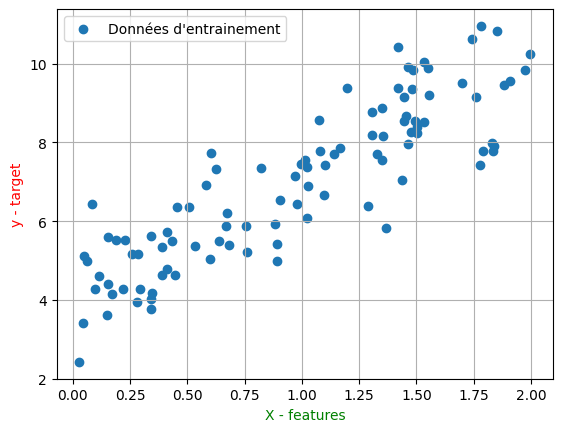

In [31]:
plt.scatter (X, y, label="Données d'entrainement")
plt.xlabel("X - features", color="green")
plt.ylabel("y - target", color="red")
plt.grid(True)
plt.legend()

### Jeu d'entrainement - Ajout du biais

Afin que le modèle puisse estimer le biais correctement, il faut ajouter la pondération $X_0$ = 1<br>
ainsi le biais $\theta_0$ est multiplié par 1 à chaque observations
|||
|:--:|:---| 
|`np.ones((100, 1))` |  crée 100 lignes de 1 colonne, remplie de valeurs 1<br> correspond à la feature fictive $𝑥_0 = 1$ <br> pour chaqune des 100 observations du jeu d'entrainement|
|`np.c_[]` | concatène la colonne de 1 avec la matrice $X$ qui passe donc de dimension (100,1) à (100,2)

La nouvelle matrice $𝑋𝑏$ constituée d'une première colonne de 1 suivie des valeurs de $𝑋$

In [32]:
X_b = np.c_[np.ones((100, 1)), X] 

### Equation normale de $\theta$
Formule mathématique qui donne le meilleur vecteur de paramètres $\theta$

Minimise l'erreur quadratique entre les prédictions et les valeurs réelles 𝑦

Cela fonctionne sous l'hypothèse que $𝑋^TX$ est inversible

Ce qui est généralement le cas si les colonnes de 𝑋 sont linéairement indépendantes.

$$ \hat{\theta} = (X^T X)^{-1} X^T y $$

|||
|:--:|:---|
|np.linalg.inv()   |    calcule l'inverse de la matrice obtenue à l'étape précédente|
|$X_b.T$             |   la transposée de la matrice $X_b$ <br> dimention (2, 100)|
|$X_b$               |   dimention (100, 2)|

Dans la 2ème cellule, quand on à défini le vecteur target y, on avait donné les paramètres 4 et 3 et le bruit<br>
Sans ce bruit, l'équation normale aurais permis de retrouver ces paramètre 4 et 3.

In [33]:
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
best_theta

array([[4.06164983],
       [2.99154293]])

### Jeu de test - Features ou variable explicative
Tableau `𝑋_test` avec deux nouvelles observations qui ont pour valeurs 0 et 2<br>
`𝑋_test` est de dimension (2,1) <br>
2 lignes, 1 colonne<br>


In [38]:
# X_test = np.array([[0], [2]])      # 2 valeurs pour tracer une droite
X_test = np.linspace(0, 2, 10).reshape(-1, 1)  # 10 valeurs entre 0 et 2

### Jeu de test - ajout du biais
Comme pour le jeu d'entrainement, on ajoute une colonne de 1 <br>
||dimension|
|:--:|:---|
|`X_test` | (2,1) |
|`X_test_b` | (2,2) |

In [39]:
# X_test_b = np.c_[np.ones((2, 1)), X_test]    # 2 valeurs pour tracer une droite
X_test_b = np.c_[np.ones((10, 1)), X_test]   # 10 valeurs entre 0 et 2

### Jeu de test - Prédiction avec l'équation normale.
#### Vecteur des meilleurs paramètres du modèle linéaire :

`y_predict = X_test_b . θ_best` <br>

Chaque ligne est multipliée par `𝜃_best`, le vecteur des meilleurs paramètres (les coefficients optimaux) du modèle linéaire obtenus via l'équation normale.

Chaque ligne de `𝑋_test_b` (chaque observation) est multipliée par le vecteur des paramètres `𝜃_best` pour produire la prédiction `𝑦_predict`

In [ ]:
y_predict = X_test_b @ best_theta

array([[ 4.06164983],
       [ 4.72643715],
       [ 5.39122447],
       [ 6.05601179],
       [ 6.7207991 ],
       [ 7.38558642],
       [ 8.05037374],
       [ 8.71516105],
       [ 9.37994837],
       [10.04473569]])

(0.0, 2.0, 0.0, 15.0)

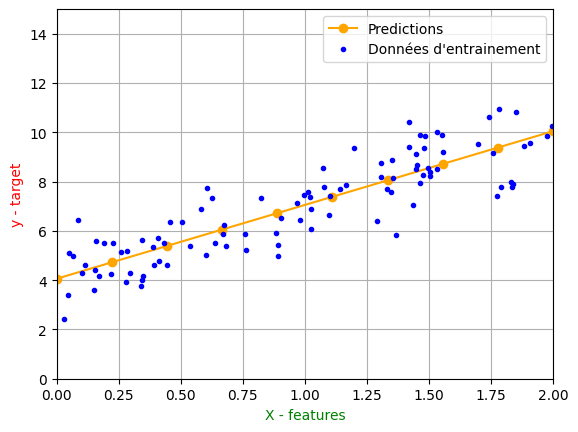

In [48]:
#  version avec une droite 
plt.plot(X_test, y_predict, "o-", label="Predictions", color="orange")
#  Version avec 10 points
# plt.scatter(X_test, y_predict, color="orange", label="Prédictions", marker="x", s=100)
plt.plot(X, y, "b.", label="Données d'entrainement")
plt.xlabel("X - features", color="green")
plt.ylabel("y - target", color="red")
plt.grid(True)
plt.legend()
# fixe les limites des axes x et y
plt.axis([0, 2, 0, 15])